# 決定木実装(深さが可変)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
from scipy.stats import mode

サンプルデータセット

In [2]:
X, y = make_blobs(n_samples=30, centers=2, n_features=2,random_state=0, cluster_std=1)

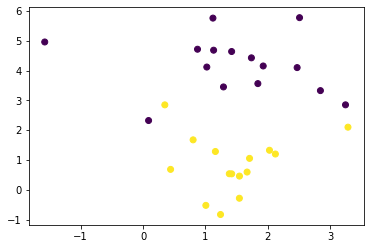

In [3]:
plt.scatter(X[:,0],X[:,1], c=y);

In [193]:
class Tree():
    def __init__(self,label=None, gain=None, depth=0):
        self.threshold = 0
        self.select_col = None
        self.gain = gain
        self.label = None
        self.node1_label = None
        self.node2_label = None
        self.depth = depth
        self.max_depth = 2
        
    def _jini(self, y):
        classes = np.unique(y)
        sum_prob = 0
        sum_mem = 0
        label = None
        for clas in classes:
            cls_sum = np.sum(y == clas)
            sample_num = y.shape[0]
            sum_prob += np.power(cls_sum/sample_num, 2)
            if sum_mem < cls_sum:
                label = clas
                sum_mem = cls_sum
        return 1-sum_prob, label, sum_mem

    def _jini_gain(self,p_node, node1, node2):
        p_jini, self.label, self.sum_mem1 = self._jini(p_node)
        n1_jini, self.node1_label, self.sum_mem2 = self._jini(node1)
        n2_jini, self.node2_label, self.sum_mem3 = self._jini(node2)
#         print(n2_jini)
        n1_sample_rate =  node1.shape[0]/p_node.shape[0]
        n2_sample_rate = node2.shape[0]/p_node.shape[0]
        impurity = p_jini - n1_sample_rate*n1_jini - n2_sample_rate*n2_jini
        
        return  impurity
    
    def _search_threshold(self, X, y):
#         print("search_now")
        for col in range(X.shape[1]):
                for thr in X[:,col]:
                    high_idx = X[:,col] >= thr
                    low_idx = X[:,col] < thr
#                     print(f"high_index:{y[high_idx]}")
                    node_high = y[high_idx]
                    node_low = y[low_idx]
                    now_gain = self._jini_gain(y, node_high, node_low)
#                     print(f"loop内(nowgain):{now_gain}")
                    print(f"loop内(self.gain):{self.gain}")
#                     print('-'*20)
                    if self.gain==None or now_gain > self.gain:
                        print('----------updated----------------')
                        self.gain = now_gain
                        self.threshold = thr
                        self.select_col = col
        
    def fit(self,X, y):
        if self.depth==self.max_depth or self.gain==0.0 or np.unique(y).shape[0]==1:
            self.node1=None
            self.node2=None
            print('end')
            print("="*15)
        elif X.shape[0]==1:
            self.node1=None
            self.node2=None
            print('end')
            print("="*15)
        else:
            print(f"X_shape{X.shape},y_shape{y.shape}")
            self._search_threshold(X, y)
#             print(f"mem1:{self.sum_mem1},mem1:{self.sum_mem2},mem2:{self.sum_mem3}")
            print(f"threshold{self.threshold},select_col{self.select_col},depth{self.depth},jini{self.gain}")
#             print(f"label1:{self.node1_label}, label2{self.node2_label}")
#             print(X[X[:, self.select_col]>=self.threshold], y[X[:, self.select_col]>=self.threshold])
#             print(f"now:{y[X[:, self.select_col]>=self.threshold]}")
#             print(f"now_index:{X[:, self.select_col]>= self.threshold}")
#             print(f"now:{X}")
#             print(f"now_select_col:{self.select_col}")
            print('='*20)
            self.node1 = Tree(depth=self.depth+1, label=self.node1_label)#, gain=self.gain)
            self.node2 = Tree(depth=self.depth+1, label=self.node2_label)#, gain=self.gain)
            self.node1.fit(X[X[:, self.select_col]>=self.threshold], y[X[:, self.select_col]>=self.threshold])
            print("----------------node1:end")
            self.node2.fit(X[X[:, self.select_col]< self.threshold], y[X[:, self.select_col]< self.threshold])
            print("----------------node2:end")
    def split_cls(self, sample):
        if (self.node1==None) or (self.node2==None):
            print(self.node1)
            print("label1:{}, label2:{}".format(self.node1_label,self.node2_label))
            print(f"select_col:{self.select_col}")
            print("答え{}".format(np.where(sample[self.select_col] >= self.threshold, self.node1_label, self.node2_label)))
            print(f"答え2:{self.label}")
            return self.label
        elif sample[self.select_col] >= self.threshold:
            print("depth:{}".format(self.depth))
            print(f"label{self.label}")
            self.node1.split_cls(sample)
        elif sample[self.select_col] < self.threshold:
            print("depth:{}".format(self.depth))
            print(f"label{self.label}")
            self.node2.split_cls(sample)
        
        
    def predict(self,X):
        # 前のアルゴリズムで得られた、列と閾値から予測
        for sample in X:
            print(self.split_cls(sample))

In [194]:
tree =Tree()
tree.fit(X, y)

X_shape(30, 2),y_shape(30,)
loop内(self.gain):None
----------updated----------------
loop内(self.gain):0.0357142857142857
loop内(self.gain):0.0357142857142857
loop内(self.gain):0.0357142857142857
loop内(self.gain):0.0357142857142857
loop内(self.gain):0.0357142857142857
loop内(self.gain):0.0357142857142857
loop内(self.gain):0.0357142857142857
loop内(self.gain):0.0357142857142857
loop内(self.gain):0.0357142857142857
----------updated----------------
loop内(self.gain):0.03600000000000009
loop内(self.gain):0.03600000000000009
loop内(self.gain):0.03600000000000009
loop内(self.gain):0.03600000000000009
loop内(self.gain):0.03600000000000009
loop内(self.gain):0.03600000000000009
loop内(self.gain):0.03600000000000009
loop内(self.gain):0.03600000000000009
loop内(self.gain):0.03600000000000009
----------updated----------------
loop内(self.gain):0.040000000000000036
loop内(self.gain):0.040000000000000036
loop内(self.gain):0.040000000000000036
loop内(self.gain):0.040000000000000036
loop内(self.gain):0.040000000000000036
l

In [195]:
for sample in X:
    tree.split_cls(sample)

depth:0
label0
depth:1
label1
None
label1:None, label2:None
select_col:None
答え[[None None]]
答え2:None
depth:0
label0
None
label1:None, label2:None
select_col:None
答え[[None None]]
答え2:None
depth:0
label0
depth:1
label1
None
label1:None, label2:None
select_col:None
答え[[None None]]
答え2:None
depth:0
label0
depth:1
label1
None
label1:None, label2:None
select_col:None
答え[[None None]]
答え2:None
depth:0
label0
None
label1:None, label2:None
select_col:None
答え[[None None]]
答え2:None
depth:0
label0
None
label1:None, label2:None
select_col:None
答え[[None None]]
答え2:None
depth:0
label0
None
label1:None, label2:None
select_col:None
答え[[None None]]
答え2:None
depth:0
label0
depth:1
label1
None
label1:None, label2:None
select_col:None
答え[[None None]]
答え2:None
depth:0
label0
depth:1
label1
None
label1:None, label2:None
select_col:None
答え[[None None]]
答え2:None
depth:0
label0
None
label1:None, label2:None
select_col:None
答え[[None None]]
答え2:None
depth:0
label0
depth:1
label1
None
label1:None, label2:None
selec

In [28]:
a = np.array([0])

In [29]:
a.shape

1